## **Convolutional Neural Network**

In [2]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from mnist import MNIST
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import time
import scikitplot as skplt

Using TensorFlow backend.


### Loading MNIST data
We use one of the dataset included in Keras: MNIST (https://en.wikipedia.org/wiki/MNIST_database).

In [3]:
#Path to your data repository
mndata = MNIST('C:\\University\\Machine learning\\Ass_2\\Sample Data')
x_train_cnn, y_train_cnn = mndata.load_training()
x_test_cnn, y_test_cnn = mndata.load_testing()

## Convolutional Neural Network

### Simple CNN

Prepare data for CNN

In [4]:
def prepare_input_data(x, y, img_s= (28, 28, 1), num_classes = 10):
  x=np.asarray(x)
  y=np.asarray(y)
  x = x.astype('float32')
  x /= 255
  x = x.reshape(x.shape[0], 28,28,1)
  y = keras.utils.to_categorical(y, num_classes)
  return x, y

In [5]:
def clf_cnn(x_train_cnn, y_train_cnn, epochs = 45, batch_size = 32, shuffle = True, sample_weight=None, num_classes = 10):
  start_time= time.time()
  x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn= train_test_split(x_train_cnn, y_train_cnn, test_size = 0.2)
  
  x_train_cnn, y_train_cnn = prepare_input_data(x_train_cnn, y_train_cnn)
  x_val_cnn, y_val_cnn = prepare_input_data(x_val_cnn , y_val_cnn)
  
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_cnn.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  
  #model.add(Conv2D(64, (3, 3)))
  #model.add(Activation('relu'))

  """model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))"""

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # Fit model to data
  print(epochs)
  history = model.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs,
                validation_data=(x_val_cnn, y_val_cnn), shuffle=True)
  print("Running time: "+ str(int(time.time()-start_time))+" seconds")
  return model , history

In [ ]:
clf, history = clf_cnn(x_train_cnn, y_train_cnn, 45 , 32)

x_test_cnn, y_test_cnn = prepare_input_data(x_test_cnn, y_test_cnn)
print(history.history.keys())
print(history.history.values())

score = clf.evaluate(x_test_cnn, y_test_cnn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

45
Train on 48000 samples, validate on 12000 samples
Epoch 1/45
 1472/48000 [..............................] - ETA: 17:33 - loss: 1.1570 - acc: 0.6427

In [0]:
def plot_cnn_history(history):
    loss = [i for i in history.history.keys() if 'loss' in i and 'val' not in i]
    val_loss = [i for i in history.history.keys() if 'loss' in i and 'val' in i]
    acc = [i for i in history.history.keys() if 'acc' in i and 'val' not in i]
    val_acc = [i for i in history.history.keys() if 'acc' in i and 'val' in i]
    
    if len(loss) == 0:
        print('No Loss in history')
        return 
    
    epochs = range(1,len(history.history[loss[0]]) + 1)
    
    plt.figure(1)
    for l in loss:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.figure(2)
    for l in acc:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    fig = plt.figure()
    fig.savefig("D:\plots")

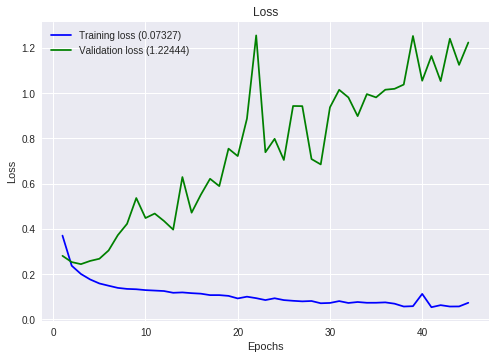

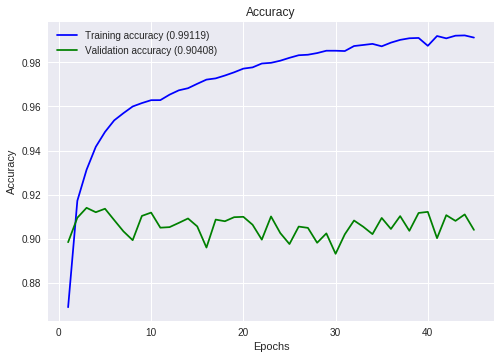

In [15]:
plot_cnn_history(history)

### Adding dropout and pooling to the CNN

In [0]:
mndata = MNIST('')
x_train_cnn, y_train_cnn = mndata.load_training()
x_test_cnn, y_test_cnn = mndata.load_testing()

In [0]:
def clf_cnn_drop_pool(x_train_cnn, y_train_cnn, epochs = 45, batch_size = 32, shuffle = True, sample_weight=None, num_classes = 10):
  start_time= time.time()
  x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn= train_test_split(x_train_cnn, y_train_cnn, test_size = 0.2)
  
  x_train_cnn, y_train_cnn = prepare_input_data(x_train_cnn, y_train_cnn)
  x_val_cnn, y_val_cnn = prepare_input_data(x_val_cnn , y_val_cnn)
  
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape= x_train_cnn.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # Fit model to data
  print(epochs)
  history = model.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs,
                validation_data=(x_val_cnn, y_val_cnn), shuffle=True)
  print("Running time: "+ str(int(time.time()-start_time))+" seconds")
  return model, history

Evaluate model score on test set.

In [18]:
clf, history = clf_cnn_drop_pool(x_train_cnn, y_train_cnn, 45 , 32)
x_test_cnn, y_test_cnn = prepare_input_data(x_test_cnn, y_test_cnn)
score = clf.evaluate(x_test_cnn, y_test_cnn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

45
Train on 48000 samples, validate on 12000 samples
Epoch 1/45
48000/48000 [==============================] - 18s 370us/step - loss: 0.7494 - acc: 0.7283 - val_loss: 0.4753 - val_acc: 0.8327
Epoch 2/45
48000/48000 [==============================] - 17s 363us/step - loss: 0.4854 - acc: 0.8229 - val_loss: 0.4011 - val_acc: 0.8588
Epoch 3/45
48000/48000 [==============================] - 17s 363us/step - loss: 0.4268 - acc: 0.8468 - val_loss: 0.3682 - val_acc: 0.8746
Epoch 4/45
48000/48000 [==============================] - 17s 362us/step - loss: 0.3934 - acc: 0.8603 - val_loss: 0.3461 - val_acc: 0.8779
Epoch 5/45
48000/48000 [==============================] - 17s 361us/step - loss: 0.3683 - acc: 0.8697 - val_loss: 0.3329 - val_acc: 0.8859
Epoch 6/45
48000/48000 [==============================] - 17s 362us/step - loss: 0.3519 - acc: 0.8744 - val_loss: 0.3146 - val_acc: 0.8895
Epoch 7/45
48000/48000 [==============================] - 17s 362us/step - loss: 0.3346 - acc: 0.8812 - val_loss:

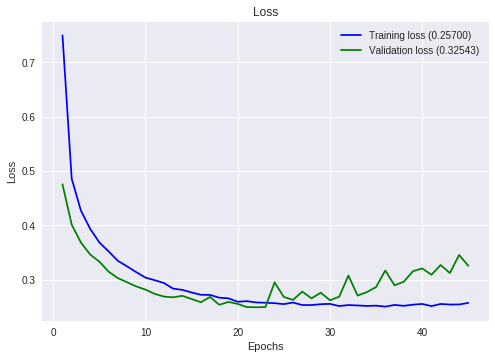

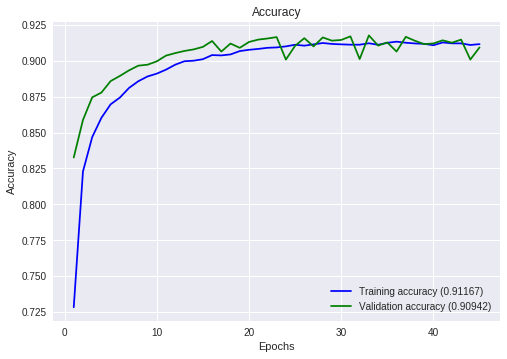

In [19]:
plot_cnn_history(history)

In [0]:
#Code to evaluate performance metrics
x_test_cnn, y_test_cnn = prepare_input_data(x_test_cnn, y_test_cnn)
test_labels_prob= clf.predict(x_test_cnn)
test_labels_class = clf.predict_classes(x_test_cnn)
prob_class=np.zeros(len(test_labels_class))
for i in range(len(test_labels_class)):
  prob_class[i] = test_labels_prob[i,test_labels_class[i]]
pred_labels = test_labels_class
x_test_cnn, test_labels = mndata.load_testing()

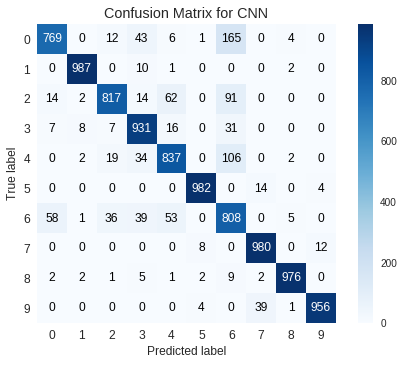

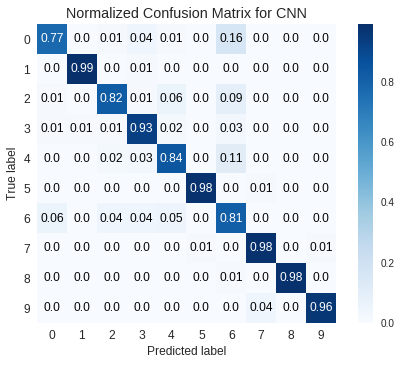

             precision    recall  f1-score   support

          0       0.90      0.77      0.83      1000
          1       0.99      0.99      0.99      1000
          2       0.92      0.82      0.86      1000
          3       0.87      0.93      0.90      1000
          4       0.86      0.84      0.85      1000
          5       0.98      0.98      0.98      1000
          6       0.67      0.81      0.73      1000
          7       0.95      0.98      0.96      1000
          8       0.99      0.98      0.98      1000
          9       0.98      0.96      0.97      1000

avg / total       0.91      0.90      0.91     10000



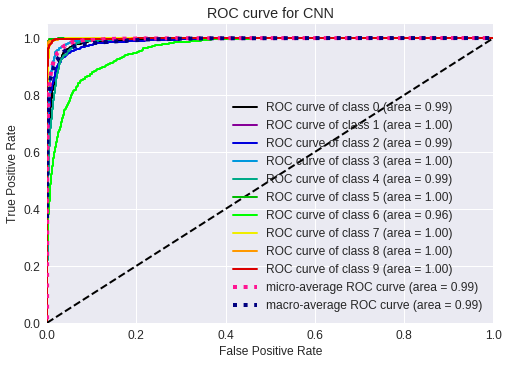

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


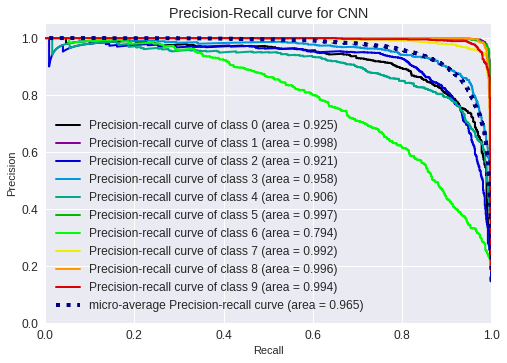

In [31]:
# confusion matrix

skplt.metrics.plot_confusion_matrix(test_labels, pred_labels, title='Confusion Matrix for CNN')

plt.show()


# normalized confusion matrix

skplt.metrics.plot_confusion_matrix(test_labels, pred_labels, title='Normalized Confusion Matrix for CNN', normalize=True)

plt.show()


# precision    recall  f1-score   support

print(classification_report(np.array(test_labels), pred_labels))


# roc curve

skplt.metrics.plot_roc(np.array(test_labels), test_labels_prob, title = 'ROC curve for CNN')

plt.show()


# Precision_Recall Curve

skplt.metrics.plot_precision_recall_curve(np.array(test_labels), test_labels_prob, title = 'Precision-Recall curve for CNN')

plt.show()

